In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 15
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 15
mlp.rcParams['xtick.color'] = '#4DFC2D'

mlp.rcParams['ytick.major.size'] = 15
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 15
mlp.rcParams['ytick.color'] = '#4DFC2D'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#ED6919'
mlp.rcParams['axes.labelcolor'] = '#ED6919'

In [74]:
df = pd.read_csv('train.csv').drop('PassengerId', axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Filling in missing values

In [76]:
df.Age = df.Age.fillna(
    df.groupby('Sex').Age.transform('mean')
)

In [77]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [78]:
df.Cabin = df.Cabin.str[0]

df.Name = df.Name.str.split(',').str[1]

# New features
df['Title'] = df.Name.str.split('.').str[0]
df['FamilySize'] = df.SibSp + df.Parch + 1

df.Embarked = df.Embarked.fillna(
    df.Embarked.value_counts().index[0]
)

In [79]:
# Drop Cabin, as it has > 50% NaN values, drop used columns
df = df.drop(['Name', 'Cabin', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [82]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [197]:
X = df.drop('Survived', axis=1)
y = df.Survived

In [198]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize'], dtype='object')

In [199]:
numeric_columns = ['Age', 'Fare', 'FamilySize']
categorical_columns = [x for x in X.columns if x not in numeric_columns]

In [89]:
X.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,male,22.000000,7.2500,S,Mr,2
1,1,female,38.000000,71.2833,C,Mrs,2
2,3,female,26.000000,7.9250,S,Miss,1
3,1,female,35.000000,53.1000,S,Mrs,2
4,3,male,35.000000,8.0500,S,Mr,1
5,3,male,30.726645,8.4583,Q,Mr,1
6,1,male,54.000000,51.8625,S,Mr,1
7,3,male,2.000000,21.0750,S,Master,5
8,3,female,27.000000,11.1333,S,Mrs,3
9,2,female,14.000000,30.0708,C,Mrs,2


#### EDA

Numeric columns

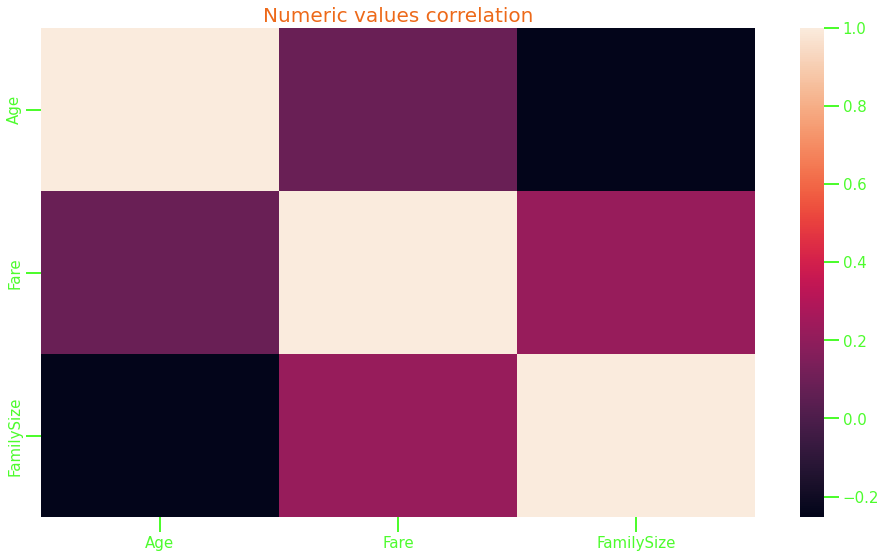

In [99]:
fig = plt.figure(figsize=(16, 9))

sns.heatmap(X[numeric_columns].corr())
plt.title('Numeric values correlation')

plt.show()

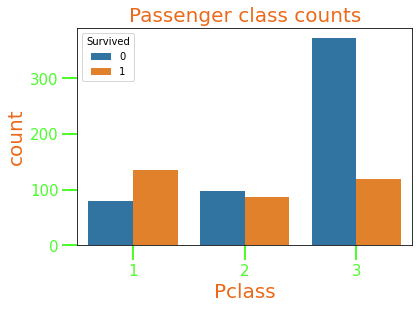

In [100]:
fig = plt.figure()

sns.countplot(x=df.Pclass, hue=df.Survived)
plt.title('Passenger class counts')

plt.show()

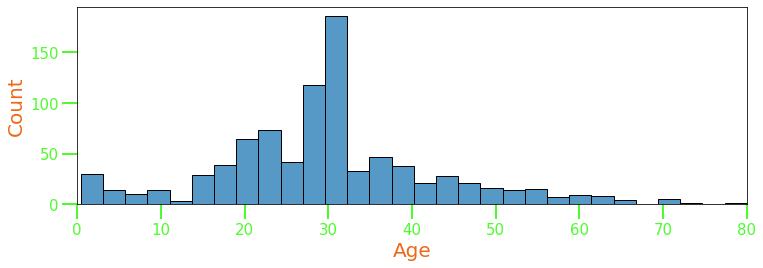

In [101]:
fig = plt.figure(figsize=(12, 8))
# plt.title('Overall age distribution', loc='right')


ax1 = fig.add_subplot(2, 1, 1)
sns.histplot(df.Age)
plt.xlim((0, df.Age.max()))
# plt.title('Before outliers deletion')


# lower = df.Age.quantile(0.005)
# upper = df.Age.quantile(0.975)

# ax2 = fig.add_subplot(2, 1, 2)
# sns.histplot(
#     df[df.Age.between(lower, upper, inclusive='both')].Age
# )
# plt.xlim((0, df.Age.max()))
# plt.title('After outliers deletion')
# fig.tight_layout()

plt.show()

Removing age outliers might badly affect the score: elderly people or babies would be more likely to survive

In [103]:
X

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,male,22.000000,7.2500,S,Mr,2
1,1,female,38.000000,71.2833,C,Mrs,2
2,3,female,26.000000,7.9250,S,Miss,1
3,1,female,35.000000,53.1000,S,Mrs,2
4,3,male,35.000000,8.0500,S,Mr,1
...,...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,S,Rev,1
887,1,female,19.000000,30.0000,S,Miss,1
888,3,female,27.915709,23.4500,S,Miss,4
889,1,male,26.000000,30.0000,C,Mr,1


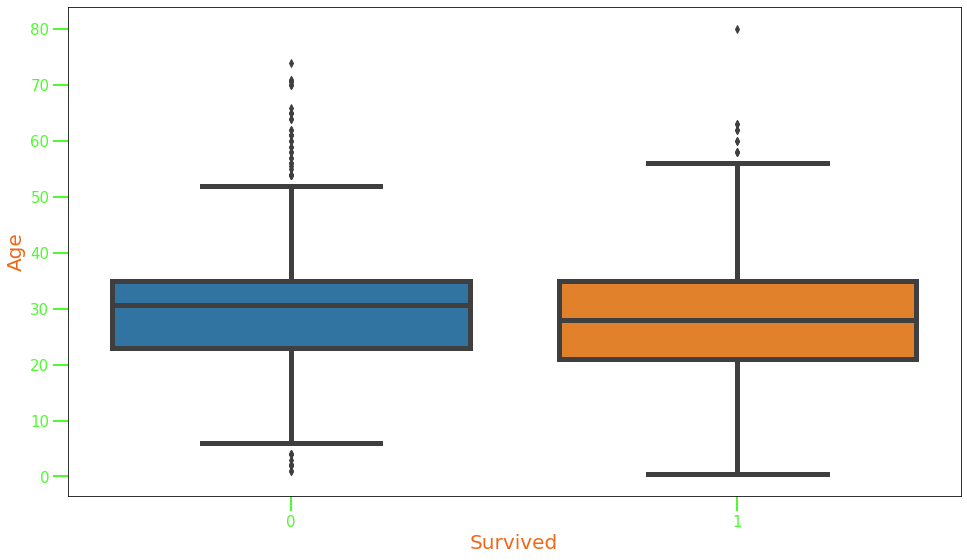

In [106]:
fig = plt.figure(figsize=(16, 9))
# plt.title('Age distribution (Survived or not)', loc='right')

sns.boxplot(x=df.Survived, y=df.Age)

plt.show()

Merging *SibSp* and *Parch* into *Relatives* column

Survivors' percentage for 1 relatives: 	 30.353817504655492
Survivors' percentage for 2 relatives: 	 55.27950310559006
Survivors' percentage for 3 relatives: 	 57.84313725490196
Survivors' percentage for 4 relatives: 	 72.41379310344827
Survivors' percentage for 5 relatives: 	 20.0
Survivors' percentage for 6 relatives: 	 13.636363636363637
Survivors' percentage for 7 relatives: 	 33.333333333333336
Survivors' percentage for 8 relatives:	 0
Survivors' percentage for 11 relatives:	 0


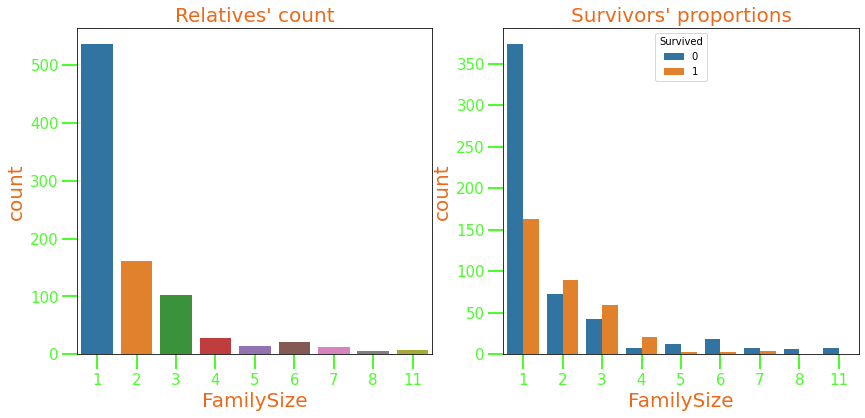

In [108]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(df.FamilySize)
plt.title("Relatives' count")

ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(x=df.FamilySize, hue=df.Survived)
plt.title("Survivors' proportions")

for count in sorted(df.FamilySize.unique()):
    if count in df[df.Survived == 1].FamilySize.unique():
        percentage = 100 * df[df.Survived == 1].FamilySize \
            .value_counts()[count] / df[df.FamilySize == count].shape[0]
        print(f"Survivors' percentage for {count} relatives: \t {percentage}")
    else:
        print(f"Survivors' percentage for {count} relatives:\t 0")

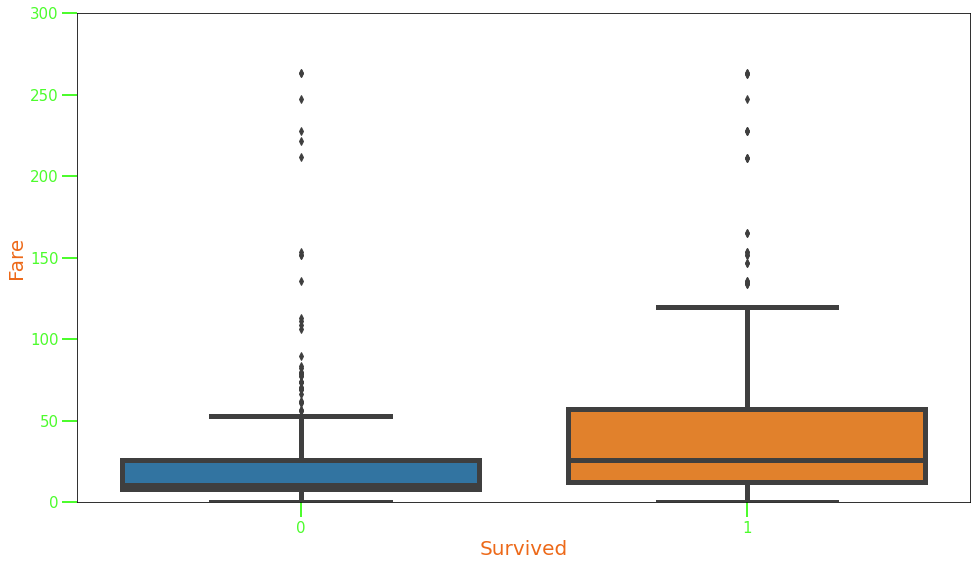

In [113]:
plt.figure(figsize=(16, 9))

sns.boxplot(x=df.Survived, y=df.Fare)
plt.ylim(0, 300)
plt.show()

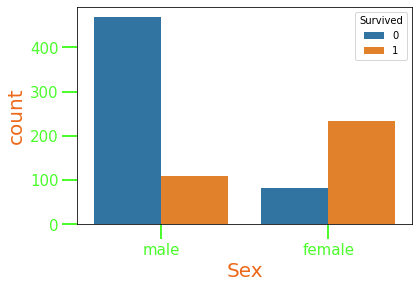

In [118]:
sns.countplot(x=df.Sex, hue=df.Survived)

plt.show()

Text(0.5, 0, 'Sex')

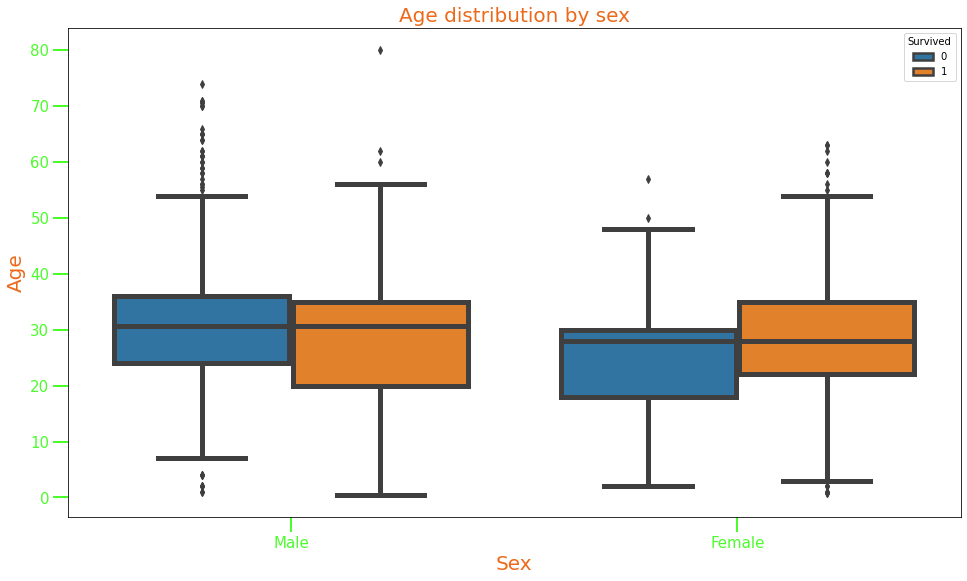

In [115]:
fig = plt.figure(figsize=(16, 9))

ax = sns.boxplot(x=df.Sex, y=df.Age, hue=df.Survived)
ax.set_xticklabels(['Male', 'Female'])

plt.title('Age distribution by sex', fontsize=20)
plt.xlabel('Sex')

#### Categorical columns

In [119]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1


Survivors' percentage for S category:	 33.90092879256966
Survivors' percentage for C category:	 55.357142857142854
Survivors' percentage for Q category:	 38.96103896103896


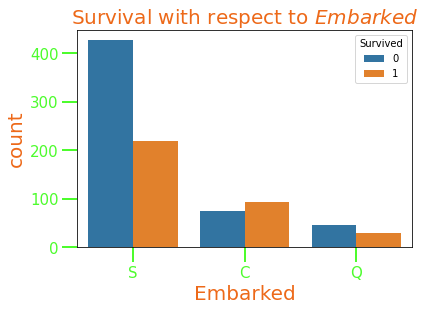

In [120]:
# sns.histplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival with respect to $Embarked$')

sns.countplot(x=df.Embarked, hue=df.Survived)

for value in df.Embarked.unique():
    print(f"Survivors' percentage for {value} category:\t"
          , 100 * df[df.Survived == 1] \
              .Embarked.value_counts()[value] / df[df.Embarked == value].shape[0])

In [121]:
X[categorical_columns].nunique()

Pclass       3
Sex          2
Embarked     3
Title       17
dtype: int64

In [125]:
X_ = X.copy()
for col in categorical_columns:
    X_ = pd.concat(
        (X_.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, drop_first=True)),
        axis=1
    )

In [126]:
X_.head()

,Age,Fare,FamilySize,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_ Col,Title_ Don,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
0,22.0,7.2500,2,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,7.9250,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,53.1000,2,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,8.0500,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
df.head()

,Survived,Pclass,Age,Fare,Female,Relatives,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,1
2,1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,0,0
3,1,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,53.1000,1,1,0,1,0,0,0,0,0,0,1
5,0,3,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,1


#### Models

In [128]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

Logistic regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.calibration import CalibrationDisplay

pipe_lr = Pipeline([
    ('scaler_lr', StandardScaler()),
    ('model_lr', LogisticRegression())
])

params_lr = {
    'model_lr__C': np.linspace(0.01, 1, num=20)
}

search_lr = GridSearchCV(pipe_lr, params_lr, scoring='accuracy', cv=10)
search_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_lr', StandardScaler()),
                                       ('model_lr', LogisticRegression())]),
             param_grid={'model_lr__C': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])},
             scoring='accuracy')

In [130]:
def get_model_score(model, model_name):
    print(f"{model_name}'s train accuracy:\t {model.score(X_train, y_train)}")
    print(f"{model_name}'s test accuracy:\t {model.score(X_test, y_test)}")
    
#     PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
#     plt.title(f'PR-Curve for {model_name}')
    
#     RocCurveDisplay.from_estimator(model, X_test, y_test)
#     plt.title(f'ROC-Curve for {model_name}')
    
#     CalibrationDisplay.from_estimator(model, X_test, y_test, n_bins=15)
#     plt.title(f'Calibration for {model_name}')

In [131]:
get_model_score(search_lr.best_estimator_, "Logistic regression")

Logistic regression's train accuracy:	 0.8398876404494382
Logistic regression's test accuracy:	 0.8212290502793296


Ridge regression

In [132]:
from sklearn.linear_model import RidgeClassifier

pipe_ridge = Pipeline([
    ('scaler_ridge', StandardScaler()),
    ('model_ridge', RidgeClassifier())
])

params_ridge = {
    'model_ridge__alpha': np.linspace(-10, 10, 100)
}

search_ridge = GridSearchCV(pipe_ridge, params_ridge, scoring='accuracy', cv=10)
search_ridge.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_ridge', StandardScaler()),
                                       ('model_ridge', RidgeClassifier())]),
             param_grid={'model_ridge__alpha': array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,...
         3.73737374,   3.93939394,   4.14141414,   4.34343434,
         4.54545455,   4.74747475,   4.94949495,   5.15151515,
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ])}

In [133]:
get_model_score(search_ridge.best_estimator_, "Ridge regression")

Ridge regression's train accuracy:	 0.8328651685393258
Ridge regression's test accuracy:	 0.8156424581005587


Decision tree classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ('scaler_dt', StandardScaler()),
    ('model_dt', DecisionTreeClassifier())
])

params_dt = {
    'model_dt__criterion': ['gini', 'entropy'],
    'model_dt__max_depth': range(1, 20, 5),
    'model_dt__min_samples_leaf': range(10, 100, 10),
    'model_dt__min_samples_split': range(10, 100, 10)
}
search_dt = GridSearchCV(pipe_dt, params_dt, scoring='accuracy', cv=10, n_jobs=-1)
search_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_dt', StandardScaler()),
                                       ('model_dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model_dt__criterion': ['gini', 'entropy'],
                         'model_dt__max_depth': range(1, 20, 5),
                         'model_dt__min_samples_leaf': range(10, 100, 10),
                         'model_dt__min_samples_split': range(10, 100, 10)},
             scoring='accuracy')

In [136]:
search_dt.best_params_

{'model_dt__criterion': 'entropy',
 'model_dt__max_depth': 6,
 'model_dt__min_samples_leaf': 40,
 'model_dt__min_samples_split': 10}

In [137]:
get_model_score(search_dt, 'Decision tree')

Decision tree's train accuracy:	 0.827247191011236
Decision tree's test accuracy:	 0.8044692737430168


Random forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipe_rf = Pipeline([
    ('scaler_rf', StandardScaler()),
    ('model_rf', RandomForestClassifier())
])

params_rf = {
    'model_rf__max_depth': range(1, 40, 1),
    'model_rf__n_estimators': range(10, 50, 2),
    'model_rf__min_samples_leaf': range(1, 101, 10),
    'model_rf__min_samples_split': range(1, 101, 10)
}
search_rf = RandomizedSearchCV(pipe_rf, params_rf, scoring='accuracy', cv=10, n_jobs=-1)
search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler_rf', StandardScaler()),
                                             ('model_rf',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'model_rf__max_depth': range(1, 40),
                                        'model_rf__min_samples_leaf': range(1, 101, 10),
                                        'model_rf__min_samples_split': range(1, 101, 10),
                                        'model_rf__n_estimators': range(10, 50, 2)},
                   scoring='accuracy')

In [171]:
search_rf.best_params_

{'model_rf__n_estimators': 28,
 'model_rf__min_samples_split': 41,
 'model_rf__min_samples_leaf': 1,
 'model_rf__max_depth': 11}

In [172]:
get_model_score(search_rf, 'Random forest')

Random forest's train accuracy:	 0.8623595505617978
Random forest's test accuracy:	 0.8100558659217877


Support Vector Machine

In [143]:
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ('scaler_svm', StandardScaler()),
    ('model_svm', SVC())
])

params_svm = {
    'model_svm__C': np.linspace(0.01, 1, num=10)
}

search_svm = GridSearchCV(pipe_svm, params_svm, scoring='accuracy', cv=10)
search_svm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_svm', StandardScaler()),
                                       ('model_svm', SVC())]),
             param_grid={'model_svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
             scoring='accuracy')

In [144]:
get_model_score(search_svm, 'SVM')

SVM's train accuracy:	 0.8497191011235955
SVM's test accuracy:	 0.8100558659217877


KNearestNeighbors

In [161]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('scaler_knn', StandardScaler()),
    ('model_knn', KNeighborsClassifier())
])

params_knn = {
    'model_knn__n_neighbors': range(1, 30)
}

search_knn = GridSearchCV(pipe_knn, params_knn, scoring='accuracy', cv=10)
search_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_knn', StandardScaler()),
                                       ('model_knn', KNeighborsClassifier())]),
             param_grid={'model_knn__n_neighbors': range(1, 30)},
             scoring='accuracy')

In [162]:
get_model_score(search_knn, 'KNN')

KNN's train accuracy:	 0.848314606741573
KNN's test accuracy:	 0.8100558659217877


Gradient boosting

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline([
    ('scaler_gb', StandardScaler()),
    ('model_gb', GradientBoostingClassifier())
])

params_gb = {
    'model_gb__max_depth': range(1, 40, 2),
    'model_gb__n_estimators': range(1, 50, 1),
    'model_gb__min_samples_leaf': range(1, 101, 10),
    'model_gb__min_samples_split': range(1, 101, 10)
}
search_gb = RandomizedSearchCV(pipe_gb, params_gb, scoring='accuracy', cv=5, n_jobs=-1)
search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler_gb', StandardScaler()),
                                             ('model_gb',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'model_gb__max_depth': range(1, 40, 2),
                                        'model_gb__min_samples_leaf': range(1, 101, 10),
                                        'model_gb__min_samples_split': range(1, 101, 10),
                                        'model_gb__n_estimators': range(1, 50)},
                   scoring='accuracy')

In [180]:
get_model_score(search_gb, 'Gradient boosting')

Gradient boosting's train accuracy:	 0.8679775280898876
Gradient boosting's test accuracy:	 0.8044692737430168


Test data preprocessing

#### TODO:

In [186]:
from sklearn.base import BaseEstimator, TransformerMixin

class MetaTrasformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns_to_encode=[], target_name='Survived'):
        self.columns_to_encode = columns_to_encode
        self.target_name = target_name
    
    
    def fit(self, X, y):
        return self
    
    
    def transform(self, X, y=None):
        X_ = pd.get_dummies(X[self.columns_to_encode] \
                                   , prefix=self.columns_to_encode, drop_first=True)
        X_ = pd.concat((X_.drop(self.columns_to_encode, axis=1), ohe_piece), axis=1)
        
        return X_

In [187]:
tr = MetaTrasformer(categorical_columns)

tr.fit(X, y)

MetaTrasformer(columns_to_encode=['Pclass', 'Sex', 'Embarked', 'Title'])

In [191]:
df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.25,S,Mr,2


In [194]:
X_.head(1)

,Age,Fare,FamilySize,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_ Col,Title_ Don,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
0,22.0,7.25,2,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [218]:
set(X_.columns).difference(set(test_df.columns))

set()

In [217]:
set(test_df.columns).difference(set(X_.columns))

{'Title_ Dona'}

In [229]:
test_df = pd.read_csv('test.csv')
indexes = test_df.PassengerId
test_df = test_df.drop('PassengerId', axis=1)


test_df.Name = test_df.Name.str.split(',').str[1]

test_df['Title'] = test_df.Name.str.split('.').str[0]
test_df['FamilySize'] = test_df.SibSp + test_df.Parch + 1

test_df.Age = test_df.Age.fillna(
    test_df.groupby('Sex').Age.transform('mean')
)

test_df.Embarked.fillna(
    df.Embarked.value_counts().index[0], inplace=True
)

test_df.Fare.fillna(
    df.Fare.mean(), inplace=True
)


test_df.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
# categorical_columns = test_df.loc[:, test_df.dtypes == object].columns

# test_df['age_outlier'] =  ((test_df.Age > lower_age_bound) & (test_df.Age < upper_age_bound))


for col in categorical_columns:
    test_df = pd.concat(
        (test_df.drop(col, axis=1), pd.get_dummies(test_df[col], prefix=col, drop_first=True))
        , axis=1
    )


missing = ['Title_ Col',
 'Title_ Don',
 'Title_ Jonkheer',
 'Title_ Lady',
 'Title_ Major',
 'Title_ Mlle',
 'Title_ Mme',
 'Title_ Sir',
 'Title_ the Countess']

for col in missing:
    test_df[col] = np.zeros(test_df.shape[0])
test_df = test_df.drop('Title_ Dona', axis=1)

In [220]:
set(test_df.columns) == set(X_.columns)

True

In [221]:
test_df.isna().any().any()

False

In [222]:
models = {
    'lr': search_lr,
    'ridge': search_ridge,
    'dt': search_dt,
    'rf': search_rf,
    'svm': search_svm,
    'knn': search_knn,
    'gb': search_gb
}

In [223]:
df.describe(include=object)

,Sex,Embarked,Title
count,891,891,891
unique,2,3,17
top,male,S,Mr
freq,577,646,517


In [224]:
for model_key in models.keys():
    print(f'{model_key} accuracy:\t{models[model_key].score(X_test, y_test)}')

lr accuracy:	0.8212290502793296
ridge accuracy:	0.8156424581005587
dt accuracy:	0.8044692737430168
rf accuracy:	0.8100558659217877
svm accuracy:	0.8100558659217877
knn accuracy:	0.8100558659217877
gb accuracy:	0.8044692737430168


In [225]:
# X_test = test_df

# for model_key in models.keys():
#     y_pred = models[model_key].predict(X_test)
#     result = pd.concat((test_df.reset_index()[['PassengerId']], pd.DataFrame(y_pred)), axis=1)
#     result.columns = ['PassengerId', 'Survived']
#     result.to_csv(f'result_{model_key}.csv', index=False)

In [238]:
y_pred = search_gb.predict(test_df)
result = pd.concat((indexes \
                        , pd.DataFrame(y_pred).astype(int)), axis=1)

result.columns = ['PassengerId', 'Survived']
result.to_csv(f'RESULT.csv', index=False)

In [233]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [234]:
result.Survived.isna().sum()

0

In [235]:
result.shape

(418, 2)

In [237]:
pd.read_csv('test.csv').shape

(418, 11)